<H2>圖像的深度學習－CNN</H2>

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

%matplotlib inline

<H3>Step1. 資料預處理</H3>

In [2]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
label = {0:"飛機", 1:"車", 2:"鳥", 3:"貓", 4:"鹿", 5:"狗", 6:"青蛙", 7:"馬", 8:"船", 9:"卡車"}

圖片號碼：10000
圖片答案：車


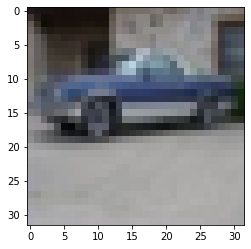

In [4]:
a = 10000
print(f'圖片號碼：{(a)}')
print(f'圖片答案：{label[y_train[a][0]]}')
plt.imshow(x_train[a])

In [5]:
# 轉成One-hot Encoding形式
from keras.utils import np_utils
x_train_shaped = x_train.astype('float32') / 255
x_test_shaped = x_test.astype('float32') / 255
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

<H3>Step2. 建立模型</H3>

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()
# 第一次卷積和第一次池化
model. add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [8]:
model.add(Dropout(0.25)) # 斷開25%的連接
# 並且加入第二次卷積和第二次池化
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [9]:
model.add(Flatten()) # 把處理過的東西攤開成為一維
model.add(Dropout(rate=0.25)) # 斷開25%的連接

In [10]:
# 全連接層
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.25))

In [11]:
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0

<H4>Param參數個數 (寬度*高度*通道數+bias)*濾波器</H4>
<p>第一層卷積層896：(3*3*3+1)*32=896</p>
<p>第二層卷積層18,496：(3*3*32+1)*64=18,496</p>
<p>全連接層524,416：4096*128+128(bias)=524,416</p>

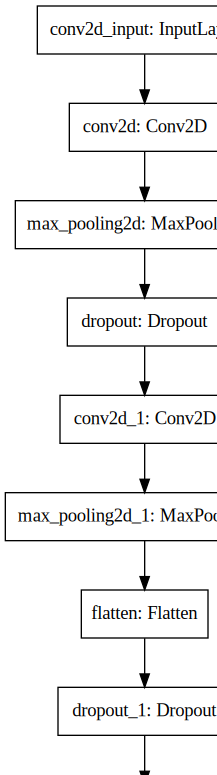

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [14]:
# 開始訓練
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_train_shaped, y=y_train_cat, validation_split=0.1, epochs=10, batch_size=128, verbose=2)

Epoch 1/10
352/352 - 24s - loss: 1.7955 - accuracy: 0.3497 - val_loss: 1.4342 - val_accuracy: 0.4960
Epoch 2/10
352/352 - 24s - loss: 1.4175 - accuracy: 0.4877 - val_loss: 1.2595 - val_accuracy: 0.5584
Epoch 3/10
352/352 - 24s - loss: 1.2778 - accuracy: 0.5457 - val_loss: 1.1248 - val_accuracy: 0.6130
Epoch 4/10
352/352 - 25s - loss: 1.1930 - accuracy: 0.5769 - val_loss: 1.0728 - val_accuracy: 0.6344
Epoch 5/10
352/352 - 25s - loss: 1.1324 - accuracy: 0.6003 - val_loss: 1.0176 - val_accuracy: 0.6496
Epoch 6/10
352/352 - 24s - loss: 1.0773 - accuracy: 0.6197 - val_loss: 0.9420 - val_accuracy: 0.6780
Epoch 7/10
352/352 - 24s - loss: 1.0435 - accuracy: 0.6303 - val_loss: 0.9309 - val_accuracy: 0.6830
Epoch 8/10
352/352 - 24s - loss: 1.0079 - accuracy: 0.6446 - val_loss: 0.9403 - val_accuracy: 0.6794
Epoch 9/10
352/352 - 24s - loss: 0.9785 - accuracy: 0.6539 - val_loss: 0.8686 - val_accuracy: 0.7048
Epoch 10/10
352/352 - 25s - loss: 0.9520 - accuracy: 0.6629 - val_loss: 0.8958 - val_accura

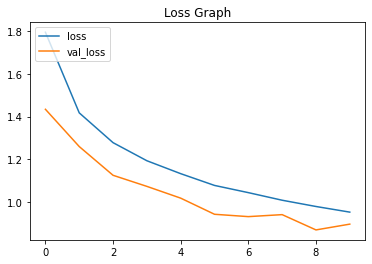

In [16]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Loss Graph')
plt.legend(['loss', 'val_loss'], loc='upper left')

In [17]:
model.evaluate(x_test_shaped, y_test_cat)

313/313 [==============================] - 1s 5ms/step - loss: 0.9239 - accuracy: 0.6815


[0.923915445804596, 0.6815000176429749]

<H3>Step3. 儲存模型</H3>

In [18]:
model.save('cnn1.h5')

<H2>再論CNN</H2>

In [7]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
label = {0:"飛機", 1:"車", 2:"鳥", 3:"貓", 4:"鹿", 5:"狗", 6:"青蛙", 7:"馬", 8:"船", 9:"卡車"}

In [8]:
a = 14
print(f'圖片號碼：{(a)}')
print(f'圖片答案：{label[y_train[a][0]]}')
plt.imshow(x_train[a])

圖片號碼：14
圖片答案：卡車


In [10]:
from keras.utils import np_utils
x_train_shaped = x_train.astype('float32') / 255
x_test_shaped = x_test.astype('float32') / 255
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [12]:
model = Sequential()
# 第一次卷積和第一次池化
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
model.add(Dropout(0.25))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
model.add(Flatten())
model.add(Dropout(0.25))

In [16]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))

In [17]:
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

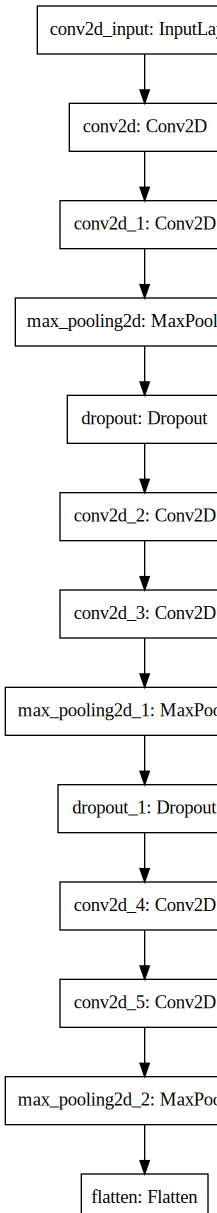

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [19]:
# 開始訓練
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_train_shaped, y=y_train_cat, validation_split=0.1, epochs=10, batch_size=128, verbose=2)

Epoch 1/10
352/352 - 195s - loss: 1.7017 - accuracy: 0.3686 - val_loss: 1.2657 - val_accuracy: 0.5384
Epoch 2/10
352/352 - 200s - loss: 1.1570 - accuracy: 0.5826 - val_loss: 0.9492 - val_accuracy: 0.6618
Epoch 3/10
352/352 - 202s - loss: 0.9397 - accuracy: 0.6658 - val_loss: 0.8641 - val_accuracy: 0.7008
Epoch 4/10
352/352 - 201s - loss: 0.8069 - accuracy: 0.7160 - val_loss: 0.7220 - val_accuracy: 0.7556
Epoch 5/10
352/352 - 198s - loss: 0.7027 - accuracy: 0.7520 - val_loss: 0.6931 - val_accuracy: 0.7658
Epoch 6/10
352/352 - 198s - loss: 0.6303 - accuracy: 0.7785 - val_loss: 0.6236 - val_accuracy: 0.7828
Epoch 7/10
352/352 - 198s - loss: 0.5696 - accuracy: 0.7999 - val_loss: 0.6179 - val_accuracy: 0.7914
Epoch 8/10
352/352 - 197s - loss: 0.5190 - accuracy: 0.8156 - val_loss: 0.6086 - val_accuracy: 0.7994
Epoch 9/10
352/352 - 199s - loss: 0.4743 - accuracy: 0.8331 - val_loss: 0.5737 - val_accuracy: 0.8094
Epoch 10/10
352/352 - 198s - loss: 0.4313 - accuracy: 0.8480 - val_loss: 0.5514 - 

In [20]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Loss Graph')
plt.legend(['loss', 'val_loss'], loc='upper left')

In [21]:
model.evaluate(x_test_shaped, y_test_cat)

313/313 [==============================] - 10s 32ms/step - loss: 0.5802 - accuracy: 0.8075


[0.580191969871521, 0.8075000047683716]